# SKLearn

## Bike Sharing Demand 

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов

В наборе признаков присутствуют вещественные, категориальные и бинарные данные

Для демонстрации используется обучающая выборка из исходных данных train.csv, файлы для работы прилагаются

### Библиотеки 

In [6]:
from sklearn import cross_validation, grid_search, linear_model, metrics

import numpy as np
import pandas as pd
import os

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных 

In [7]:
path = os.path.join('datasets', 'bike_sharing_demand.csv')
raw_data = pd.read_csv(path, header=0, sep=',')

In [8]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
raw_data.shape

(10886, 12)

Смотрим, есть ли пропущенные данные

In [12]:
raw_data.isnull().values.any()

False

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [14]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [15]:
raw_data['month'] = raw_data.datetime.apply(lambda x: x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x: x.hour)

In [16]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


#### Обучение и отложенный тест 

In [19]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [20]:
print(raw_data.shape, train_data.shape, hold_out_test_data.shape)

(10886, 14) (9886, 14) (1000, 14)


In [22]:
print('train period from {} to {}'.format(train_data.datetime.min(), train_data.datetime.max()))

train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00


In [23]:
print('evaluation period from {} to {}'.format(hold_out_test_data.datetime.min(), 
                                               hold_out_test_data.datetime.max()))

evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


#### Данные и целевая функция 

In [24]:
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count'], axis=1)

In [25]:
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count'], axis=1)

#### Целевая функция на обучающей выборке и на отложенном тесте

Text(0.5,1,'test data')

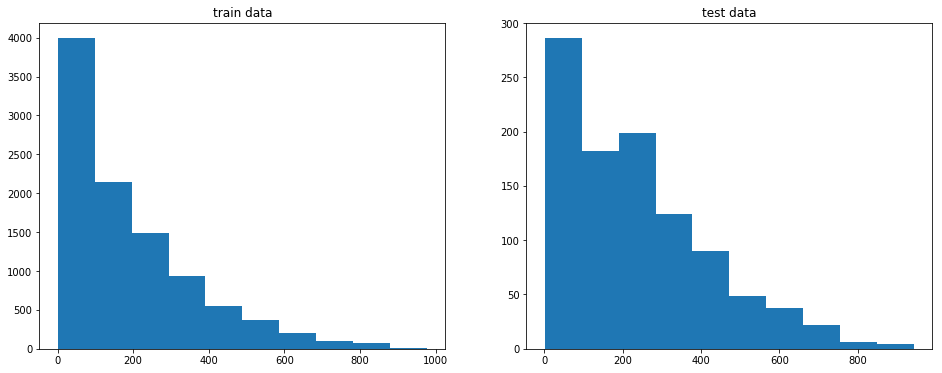

In [26]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1, 2, 1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1, 2, 2)
pylab.hist(test_labels)
pylab.title('test data')

#### Числовые признаки 

In [27]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [28]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [29]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [30]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


#### Модель 

In [31]:
regressor = linear_model.SGDRegressor(random_state=0)

In [33]:
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

C:\Users\vlnlo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


31851310300813.895

In [37]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [38]:
print(regressor.predict(test_data)[:10])

[6.38237236e+13 9.93774167e+13 4.50263651e+13 3.24238509e+13
 3.17252459e+13 4.39305995e+13 4.44982989e+13 4.41783289e+13
 4.68904479e+13 5.83210989e+13]


In [39]:
print(regressor.coef_)

[ 1.51022653e+11 -5.06697186e+10  4.53044112e+10 -7.46986340e+10
  1.80525319e+11  1.10015690e+11 -3.01811345e+09  8.39465294e+10]


#### Scaling 

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [42]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

C:\Users\vlnlo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.11793762963431477

In [43]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [44]:
print(regressor.predict(scaled_test_data[:10]))

[524.82767322 834.83176277 354.85768824 221.89221002 227.84049612
 324.88196372 327.8982227  307.9347954  345.90146969 445.90141764]


#### Подозрительно хорошо? 

In [45]:
print(regressor.coef_)

[ 1.41019246e+00 -1.40725539e+00  1.45346928e-02 -4.38984175e-02
  5.08589954e+01  1.48004811e+02 -8.23376876e-03  6.37720415e-03]


In [46]:
print(list(map(lambda x: round(x, 2), regressor.coef_)))

[1.41, -1.41, 0.01, -0.04, 50.86, 148.0, -0.01, 0.01]


In [47]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [48]:
train_labels[:10]

array([16, 40, 32, 13,  1,  1,  2,  3,  8, 14], dtype=int64)

In [50]:
np.all(train_data.registered + train_data.casual == train_labels)

True

In [51]:
train_data.drop(['casual', 'registered'], axis=1, inplace=True)
test_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [52]:
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [53]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

C:\Users\vlnlo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


121.81123864993025

In [54]:
print(list(map(lambda x: round(x, 2), regressor.coef_)))

[31.03, 29.96, -41.93, 6.17, 14.08, 49.6]


#### Pipeline

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline(steps=[('scaling', scaler), ('regression', regressor)])

In [57]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

C:\Users\vlnlo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


121.81123864993025

#### Подбор параметров 

In [58]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

In [68]:
parameters_grid = {
    'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'],
    'regression__n_iter': [3, 5, 10, 50],
    'regression__alpha': [0.0001, 0.01],
    'regression__penalty': ['l1', 'l2', 'none'],
    'scaling__with_mean': [0, 1],
}

In [69]:
grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring='mean_absolute_error', cv=4)

In [70]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 11.3 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 'regression__n_iter': [3, 5, 10, 50], 'regression__alpha': [0.0001, 0.01], 'regression__penalty': ['l1', 'l2', 'none'], 'scaling__with_mean': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

In [71]:
grid_cv.best_score_

-108.61449660348289

In [72]:
grid_cv.best_params_

{'regression__alpha': 0.01,
 'regression__loss': 'squared_loss',
 'regression__n_iter': 3,
 'regression__penalty': 'l2',
 'scaling__with_mean': 0}

#### Оценка по отложенному тесту 

In [73]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))

119.98978845935378

In [74]:
np.mean(test_labels)

232.159

In [75]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

In [76]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [77]:
print(test_predictions[:10])

[139.60470681 159.80765341 207.55935972 237.76288054 257.83836668
 267.44558034 272.49537469 297.70688522 304.29818873 313.58821156]


(-100, 1100)

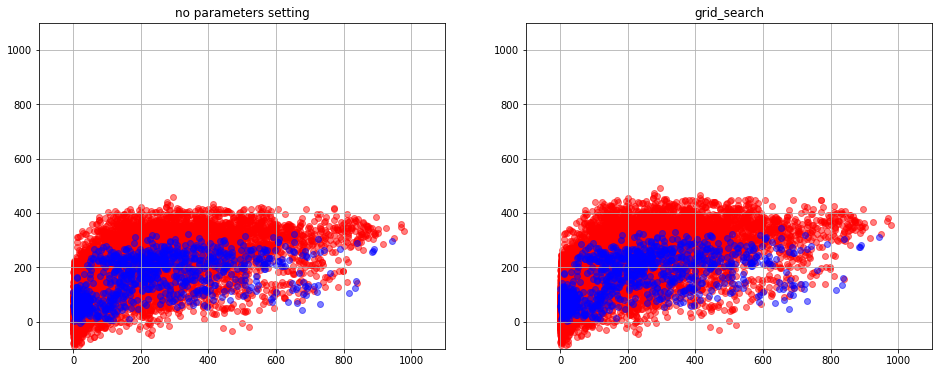

In [79]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1, 2, 1)
pylab.grid()
pylab.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color='blue')
pylab.title('no parameters setting')
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100)

pylab.subplot(1, 2, 2)
pylab.grid()
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color='blue')
pylab.title('grid_search')
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100)